In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv('Handling_Missing_Values.csv')
df = data.copy()

In [64]:
df.head()

,make_model,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,colour,...,power_kW,fuel_consumption_comb,location_country,age,inspection_status,energy_efficiency_class,safety_security_package,comfort_convenience_package,ent_media_package,num_of_extras
0,Renault Clio,16990.0,Sedan,Used,5.0,No,20926.0,Manual,LPG,Grey,...,75.266504,4.863385,France,-180,no,Inefficient,Advanced,Enhanced,Advanced,1
1,Fiat 500 Abarth,17995.0,Compact,Used,3.0,No,59629.0,Manual,Benzine,Grey,...,107.000000,6.400000,Netherlands,-3,no,Inefficient,Enhanced,Enhanced,Advanced,3
2,Nissan Micra,3250.0,Convertible,Used,2.0,No,147985.0,Manual,Benzine,Blue,...,81.000000,5.167288,Netherlands,-1,no,Efficient,Enhanced,Enhanced,Advanced,1
3,Dacia,22299.0,Compact,Pre-registered,5.0,No,110.0,Automatic,Electric,Black,...,33.000000,5.600000,Germany,0,no,Efficient,Enhanced,Advanced,Enhanced,2
4,Dacia,22479.0,Compact,Pre-registered,5.0,No,110.0,Automatic,Electric,Black,...,33.000000,5.600000,Germany,0,no,Efficient,Enhanced,Advanced,Enhanced,2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   28630 non-null  object 
 1   price                        28630 non-null  float64
 2   body_type                    28630 non-null  object 
 3   type                         28630 non-null  object 
 4   doors                        28630 non-null  float64
 5   warranty                     28630 non-null  object 
 6   mileage                      28630 non-null  float64
 7   gearbox                      28630 non-null  object 
 8   fuel_type                    28630 non-null  object 
 9   colour                       28630 non-null  object 
 10  paint                        28630 non-null  object 
 11  seller                       28630 non-null  object 
 12  seats                        28630 non-null  float64
 13  engine_size     

In [65]:
df.describe()

,price,doors,mileage,seats,engine_size,gears,co2_emissions,cylinders,empty_weight,power_kW,fuel_consumption_comb,age,num_of_extras
count,2.863000e+04,28630.000000,2.863000e+04,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28623.000000,28630.000000,28630.000000,28630.000000
mean,2.355520e+04,4.138002,7.262461e+04,4.704785,1749.092630,5.863709,133.839644,4.033042,1421.533357,119.586901,5.900159,6.836605,4.476877
std,2.595371e+04,1.212538,6.762850e+04,0.789989,1035.076434,1.512787,123.449238,1.037909,316.793795,67.841416,2.344993,8.757741,3.645175
min,4.900000e+02,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,75.000000,1.000000,0.500000,-180.000000,1.000000
25%,1.199000e+04,3.000000,2.029000e+04,4.000000,1332.000000,5.000000,106.000000,4.000000,1220.000000,80.000000,4.639062,2.000000,1.000000
50%,1.798000e+04,5.000000,5.749150e+04,5.000000,1598.000000,6.000000,126.000000,4.000000,1379.000000,100.000000,5.400000,4.000000,3.000000
75%,2.799000e+04,5.000000,1.066675e+05,5.000000,1984.000000,6.000000,157.000000,4.000000,1596.000000,137.000000,6.600000,8.000000,7.000000
max,1.346900e+06,6.000000,1.440000e+06,17.000000,99900.000000,10.000000,15168.000000,26.000000,15590.000000,665.000000,99.900000,122.000000,26.000000


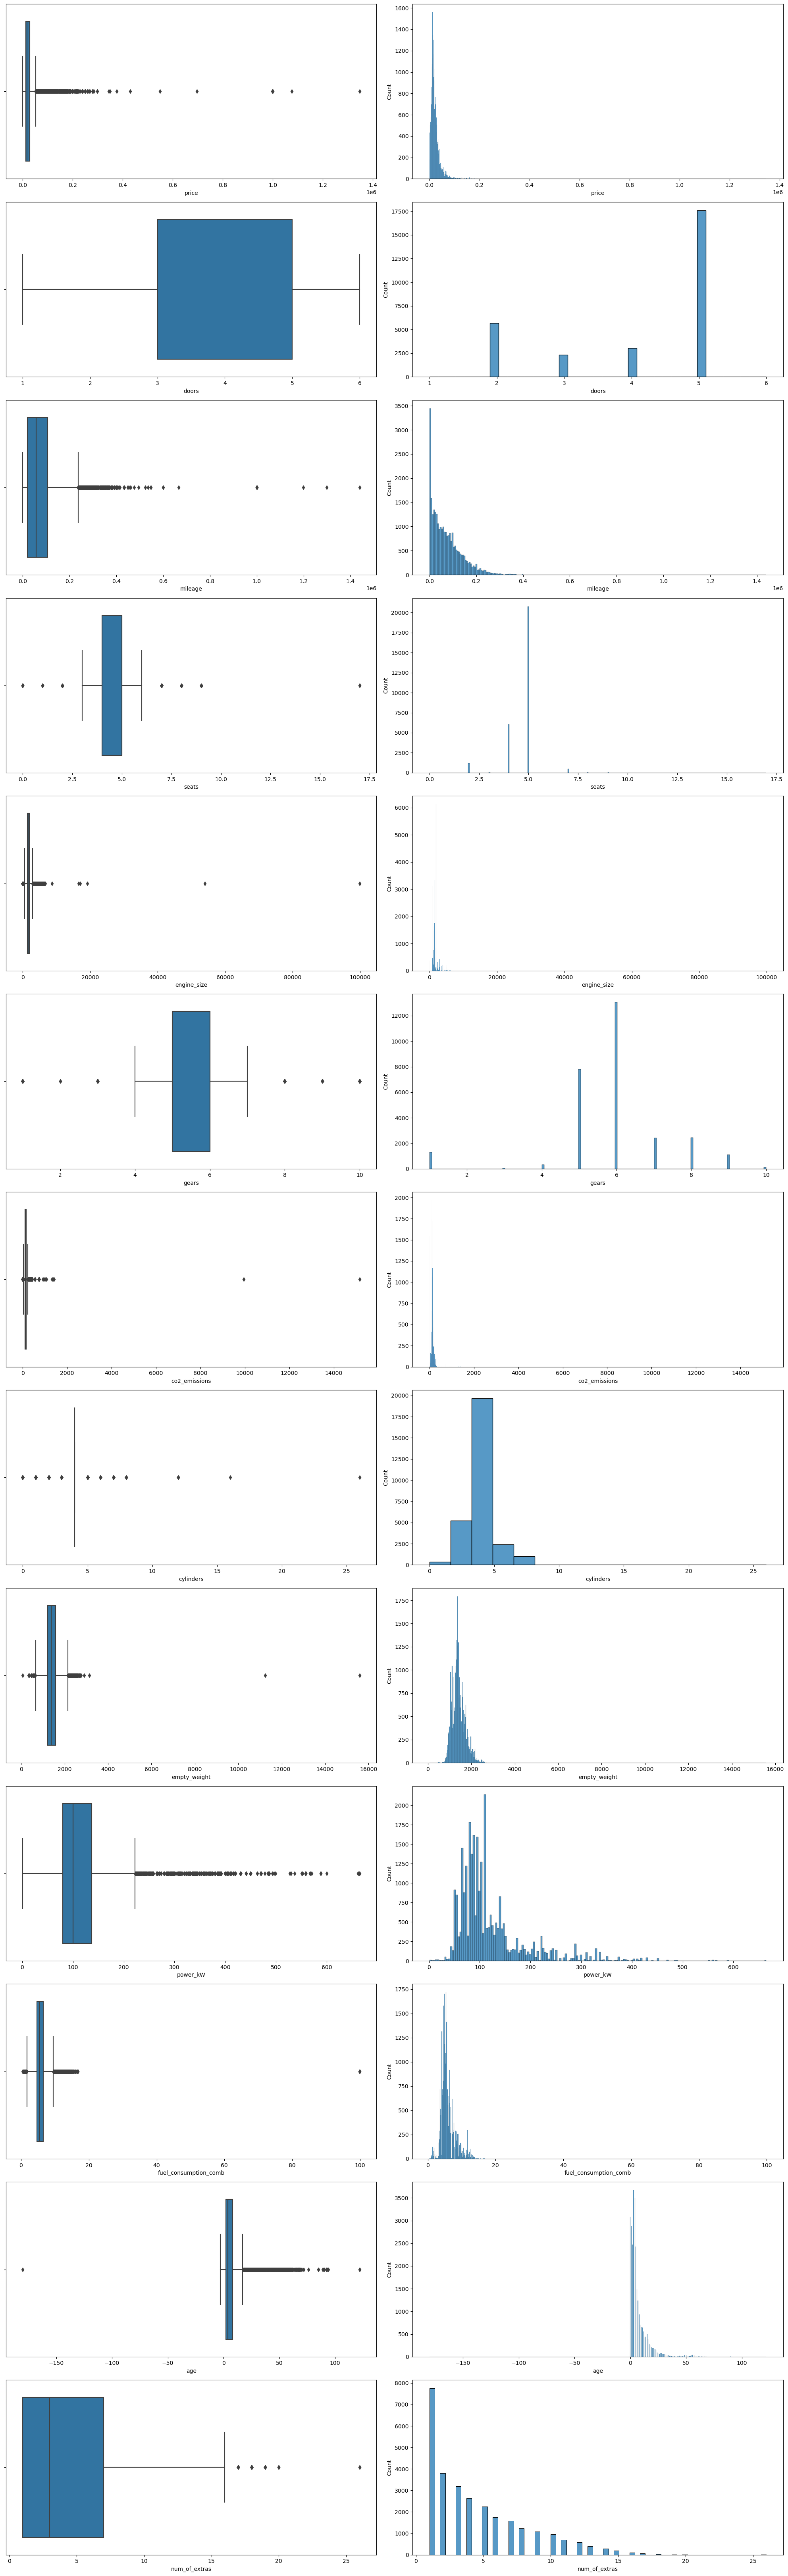

In [49]:
num_features = len(df.select_dtypes('number').columns)
num_rows = (num_features * 2 + 1) // 2  # Her bir feature için iki subplot, çift sayıya yuvarlanmış hali
plt.figure(figsize=(20, num_rows * 5))
index = 0
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(num_rows, 2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(num_rows, 2, index)
    sns.histplot(x=feature, data=df)
plt.tight_layout()
plt.show()

In [40]:
def box_plot_with_price(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, y='price')
    plt.title(f'Box plot of Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()    

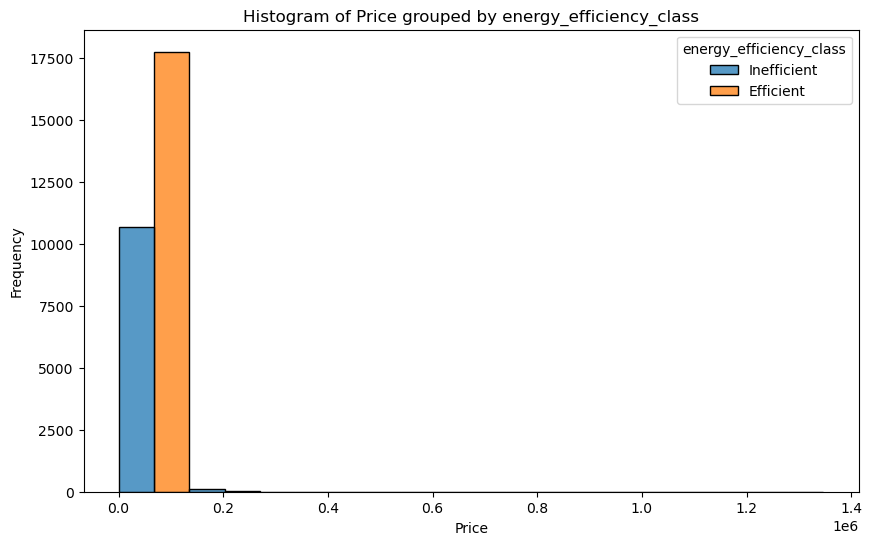

In [79]:
# Function to create a histogram of the price column grouped by another column
def histogram_price_grouped_by_column(df, column):
    plt.figure(figsize=(10, 6))
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df, x='price', hue=column, bins=10, kde=False, element="step", stat="density", common_norm=False)
    else:
        sns.histplot(df, x='price', hue=column, multiple="dodge", bins=10)
    plt.title(f'Histogram of Price grouped by {column}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
histogram_price_grouped_by_column(df, 'energy_efficiency_class')

In [43]:
# Function to create a scatter plot with the price column
def scatter_plot_with_price(df, column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=column, y='price')
    plt.title(f'Scatter plot of Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [44]:
def correlation_with_price(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        correlation = df['price'].corr(df[column])
        print(f'Correlation between Price and {column}: {correlation:.2f}')
    else:
        print(f'Column {column} is not numeric, correlation cannot be calculated.')

In [45]:
def compare_with_price(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in the DataFrame.")
        return
    
    scatter_plot_with_price(df, column)
    box_plot_with_price(df, column)
    histogram_of_price(df)
    histogram_price_grouped_by_column(df, column)
    correlation_with_price(df, column)

In [ ]:
# Heatmap to understand correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

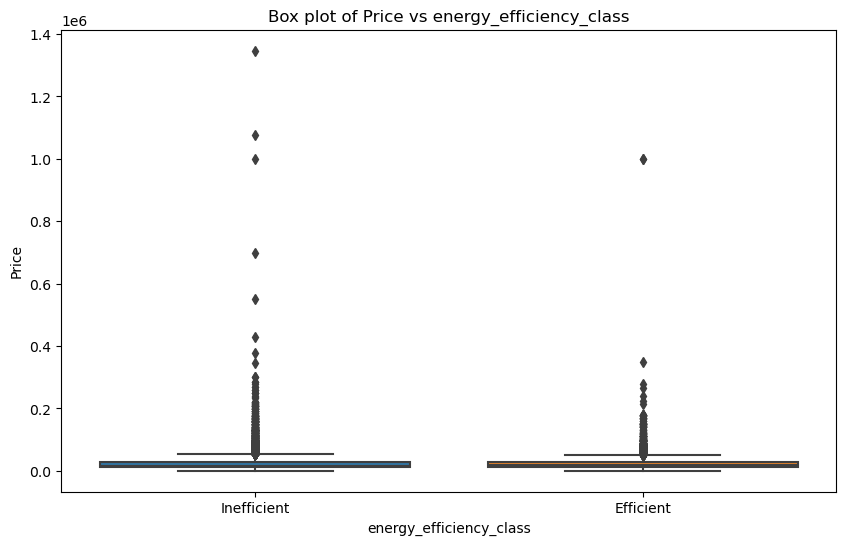

In [80]:
    box_plot_with_price(df, 'energy_efficiency_class')

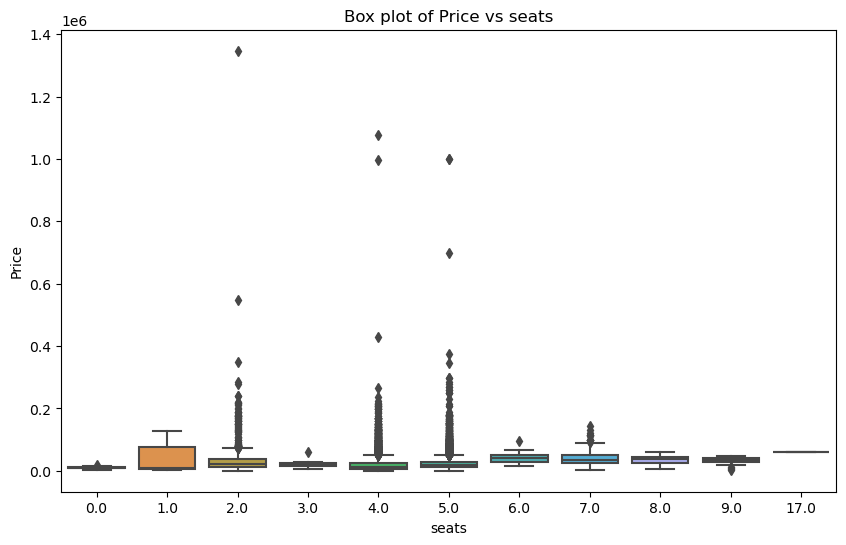

In [55]:
    box_plot_with_price(df, 'seats')

# Seats

In [60]:
df[(df['seats'] == 17) | (df['seats'] == 1) | (df['seats'] == 0)]

,make_model,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,colour,...,power_kW,fuel_consumption_comb,location_country,age,inspection_status,energy_efficiency_class,safety_security_package,comfort_convenience_package,ent_media_package,num_of_extras
1818,Opel Movano,59990.0,Station wagon,Used,5.0,No,290.0,Manual,Diesel,Blue,...,120.000000,5.400000,Germany,0,no,Efficient,Advanced,Advanced,Advanced,1
1819,Opel Movano,59990.0,Station wagon,Used,5.0,No,300.0,Manual,Diesel,Blue,...,120.000000,5.400000,Germany,0,no,Efficient,Advanced,Advanced,Advanced,1
7767,SEAT Ibiza,18950.0,Sedan,Used,4.0,Yes,11400.0,Manual,Benzine,Grey,...,70.000000,4.600000,Germany,2,no,Inefficient,Advanced,Advanced,Advanced,6
14094,Renault,6500.0,Compact,Used,2.0,No,21400.0,Automatic,Electric,Black,...,1.000000,5.962500,Italy,4,no,Efficient,Advanced,Advanced,Advanced,4
14405,SEAT Ibiza,14700.0,Compact,Used,5.0,No,66510.0,Manual,Benzine,Blue,...,85.000000,4.700000,Germany,4,no,Efficient,Advanced,Enhanced,Advanced,3
19080,Renault Twizy,7950.0,Off-Road/Pick-up,Used,2.0,Yes,35784.0,Automatic,Electric,Orange,...,13.111111,5.400000,Netherlands,6,no,Efficient,Basic,Advanced,Basic,1
19117,SEAT Ibiza,10900.0,Coupe,Used,2.0,Yes,43231.0,Manual,Benzine,Silver,...,66.000000,4.996978,Germany,6,no,Efficient,Advanced,Advanced,Advanced,3
20395,Renault Twingo,7750.0,Compact,Used,5.0,No,53335.0,Manual,Benzine,Black,...,52.000000,4.700000,Germany,7,no,Inefficient,Advanced,Enhanced,Advanced,1
20403,Renault Twizy,3999.0,Coupe,Used,2.0,No,91900.0,Automatic,Electric,White,...,8.000000,5.400000,Germany,7,no,Efficient,Basic,Advanced,Basic,1
20415,SEAT Ibiza,9900.0,Compact,Used,5.0,No,132390.0,Manual,Benzine,White,...,103.000000,4.700000,Germany,7,no,Efficient,Enhanced,Advanced,Advanced,5


In [61]:
mean_by_make_model = df.groupby(['make_model'])['seats'].mean()

# Fill the rows with values of 0 or 1 in the 'seats' column with the mean value
for index, row in data.iterrows():
    if row['seats'] == 0 or row['seats'] == 1:
        make_model = row['make_model']
        mean_seats = mean_by_make_model[make_model]
        data.at[index, 'seats'] = mean_seats

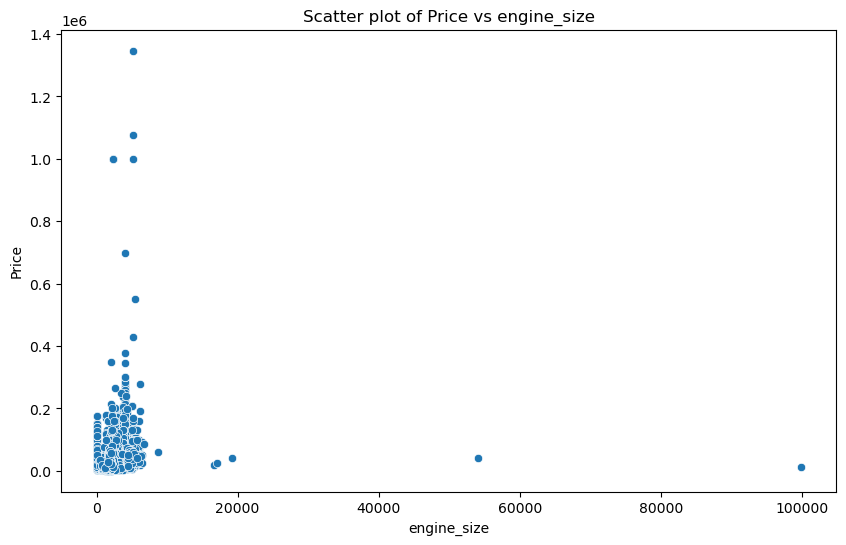

In [68]:
#https://www.webuyanycar.com/guides/car-ownership/car-engine-sizes/    scatter_plot_with_price(df, 'engine_size')

#https://www.cjponyparts.com/resources/engine-size-chart

#{\displaystyle {\mbox{Motor hacmi}}={\pi  \over 4}\times {\mbox{silindir çapı}}^{2}\times {\mbox{strok}}\times {\mbox{silindir sayısı}}}

df['engine_size'].describe()

count    28630.000000
mean      1749.092630
std       1035.076434
min          0.000000
25%       1332.000000
50%       1598.000000
75%       1984.000000
max      99900.000000
Name: engine_size, dtype: float64